# **PHẦN 1: IMPORT THƯ VIỆN VÀ ĐỌC DỮ LIỆU**

In [ ]:
!pip install lightgbm xgboost scikit-learn matplotlib seaborn joblib --quiet

# 1 Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 2 Hiển thị full cột
pd.set_option('display.max_columns', None)

# 3 Đọc dữ liệu
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

print("Dữ liệu train:", train.shape)
print(" Dữ liệu test:", test.shape)

# 4 Xem 5 dòng đầu
display(train.head(5))

# 5 Kiểm tra cột đích
print("\nCột mục tiêu:", "SalePrice" if "SalePrice" in train.columns else "Không tìm thấy")


Dữ liệu train: (1460, 81)
 Dữ liệu test: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Cột mục tiêu: SalePrice


# **PHẦN 2: TIỀN XỬ LÍ DỮ LIỆU VÀ TẠO ĐẶC TRƯNG**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df = train.copy()

# 1. Tạo các đặc trưng mới
df["TotalSF"] = df["TotalBsmtSF"].fillna(0) + df["1stFlrSF"].fillna(0) + df["2ndFlrSF"].fillna(0)
df["TotalBath"] = (df["FullBath"].fillna(0) + 0.5 * df["HalfBath"].fillna(0) +df["BsmtFullBath"].fillna(0) + 0.5 * df["BsmtHalfBath"].fillna(0))
df["TotalPorchSF"] = (df["OpenPorchSF"].fillna(0) + df["EnclosedPorch"].fillna(0) +df["3SsnPorch"].fillna(0) + df["ScreenPorch"].fillna(0))

if "YrSold" in df.columns:
    df["Age"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
else:
    df["Age"] = 2025 - df["YearBuilt"]
    df["RemodAge"] = 2025 - df["YearRemodAdd"]

df["IsRemodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)

# 2. Xử lý giá trị thiếu
cat_cols = df.select_dtypes(include="object").columns
for c in cat_cols:
    df[c] = df[c].fillna("None")

num_cols = df.select_dtypes(include=np.number).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# 3. Mã hóa biến phân loại
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Dữ liệu sau xử lý:", X_scaled.shape)
display(X_scaled.head())



Dữ liệu sau xử lý: (1460, 267)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,TotalPorchSF,Age,RemodAge,IsRemodeled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_

Tạo heatmap


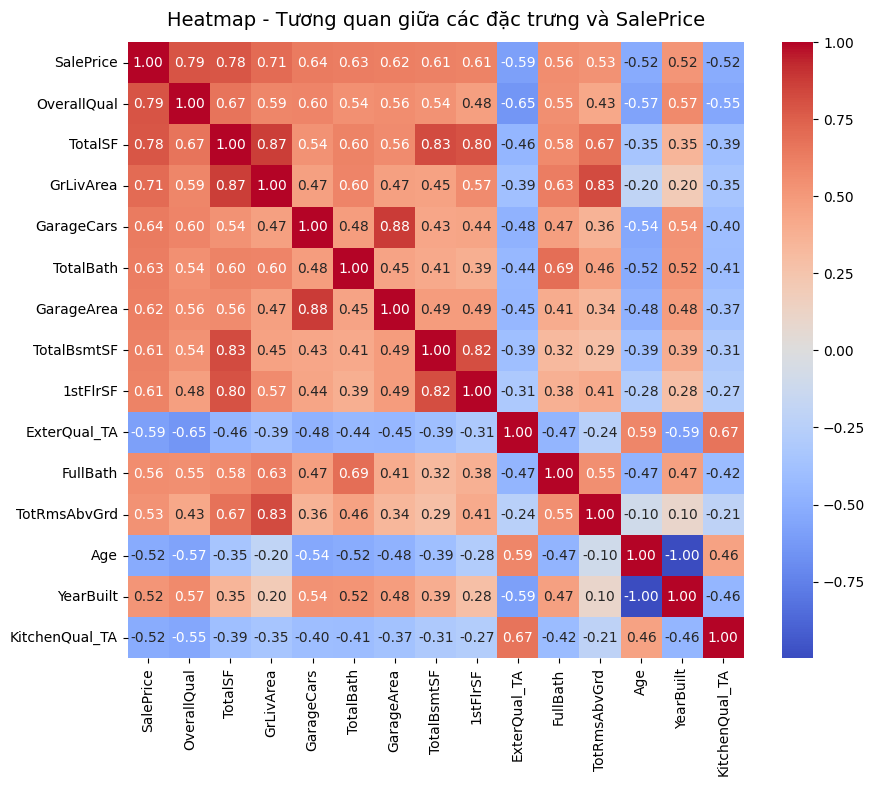

Top 15 đặc trưng có tương quan cao nhất với SalePrice:


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
TotalSF,0.782260
GrLivArea,0.708624
GarageCars,0.640409
TotalBath,0.631731
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Gộp X_scaled và y để phân tích tương quan
df_corr = X_scaled.copy()
df_corr["SalePrice"] = y

# Tính ma trận tương quan
corr_matrix = df_corr.corr(numeric_only=True)

# Lấy 15 biến có tương quan cao nhất với SalePrice
top_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(15).index

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap - Tương quan giữa các đặc trưng và SalePrice", fontsize=14, pad=12)
plt.show()

# In top đặc trưng tương quan mạnh nhất với SalePrice
print("Top 15 đặc trưng có tương quan cao nhất với SalePrice:")
display(corr_matrix["SalePrice"].sort_values(ascending=False).head(15))


OverallQual	0.79Chất lượng tổng thể của ngôi nhà có ảnh hưởng mạnh nhất đến giá bán.
TotalSF (biến mới tạo)	0.78	Tổng diện tích sàn (tầng hầm + tầng 1 + tầng 2) có tương quan rất cao, chứng minh đặc trưng mới hữu ích.
GrLivArea	0.71	Diện tích sinh hoạt trên mặt đất cũng ảnh hưởng mạnh đến giá.
GarageCars	0.64	Số lượng chỗ đỗ xe trong gara tỷ lệ thuận với giá bán.
TotalBath (biến mới tạo)	0.63	Tổng số phòng tắm (bao gồm tầng hầm) có tác động tích cực rõ rệt.
GarageArea	0.62	Diện tích gara cũng phản ánh phần nào quy mô nhà.
TotalBsmtSF	0.61	Diện tích tầng hầm góp phần vào diện tích tổng thể.
1stFlrSF	0.61	Diện tích tầng 1 ảnh hưởng đáng kể đến giá.
FullBath	0.56	Số phòng tắm đầy đủ là yếu tố tiện nghi liên quan đến giá.
TotRmsAbvGrd	0.53	Tổng số phòng trên mặt đất thể hiện quy mô và tiện nghi.
YearBuilt	0.52	Nhà càng mới thường có giá cao hơn.
YearRemodAdd	0.51	Nhà được sửa hoặc nâng cấp gần đây có giá trị cao hơn.
Foundation_PConc	0.50	Loại móng bê tông đúc sẵn (PConc) thường đi kèm nhà chất lượng cao.
MasVnrArea	0.47	Diện tích tường ốp đá/gạch có tương quan khá mạnh với giá bán.

# **PHẦN 3: HUẤN LUYỆN, BIÊN DỊCH VÀ ĐÁNH GIÁ MÔ HÌNH**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#2. Hàm compile + huấn luyện + đánh giá mô hình
def compile_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\nĐang compile và huấn luyện mô hình: {name} ")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Tính các chỉ số
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Chuyển thành nhóm giá để tính F1-score
    bins = np.quantile(y_test, [0, 0.33, 0.66, 1])
    y_class = np.digitize(y_test, bins)
    pred_class = np.digitize(preds, bins)
    f1 = f1_score(y_class, pred_class, average="weighted")

    print(f"R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | F1: {f1:.4f}")

    # Trả về kết quả
    return model, {"Model": name, "R2": r2, "RMSE": rmse, "MAE": mae, "F1": f1, "Preds": preds}

In [ ]:
# 3. Danh sách mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Polynomial Regression (deg=2)": make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=1500, learning_rate=0.01, num_leaves=31, random_state=42)
}


In [ ]:
# 4. Huấn luyện và đánh giá từng mô hình
results = []
pred_dict = {}

for name, model in models.items():
    model, res = compile_and_evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(res)
    pred_dict[name] = res["Preds"]


Đang compile và huấn luyện mô hình: Linear Regression 
R²: 0.1035 | RMSE: 82924.88 | MAE: 24052.50 | F1: 0.8172

Đang compile và huấn luyện mô hình: Lasso Regression 


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.074e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


R²: 0.4116 | RMSE: 67179.33 | MAE: 22671.41 | F1: 0.8172

Đang compile và huấn luyện mô hình: Random Forest 
R²: 0.8819 | RMSE: 30103.25 | MAE: 17821.21 | F1: 0.8499

Đang compile và huấn luyện mô hình: Polynomial Regression (deg=2) 
R²: 0.8284 | RMSE: 36283.53 | MAE: 24509.34 | F1: 0.6868

Đang compile và huấn luyện mô hình: XGBoost 
R²: 0.9146 | RMSE: 25591.07 | MAE: 15574.89 | F1: 0.8557

Đang compile và huấn luyện mô hình: LightGBM 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4161
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 176
[LightGBM] [Info] Start training from score 181441.541952
R²: 0.8899 | RMSE: 29053.74 | MAE: 16695.97 | F1: 0.8718


In [ ]:
# 5. Tổng hợp kết quả
results_df = pd.DataFrame(results).drop(columns=["Preds"])
results_df = results_df.sort_values(by="R2", ascending=False)
display(results_df)

,Model,R2,RMSE,MAE,F1
4,XGBoost,0.914619,25591.067192,15574.893555,0.855733
5,LightGBM,0.889950,29053.742875,16695.970994,0.871768
2,Random Forest,0.881856,30103.248515,17821.214966,0.849922
3,Polynomial Regression (deg=2),0.828365,36283.526216,24509.343922,0.686767
1,Lasso Regression,0.411621,67179.327419,22671.409140,0.817222
0,Linear Regression,0.103489,82924.878932,24052.498302,0.817222


-Linear Regression và Lasso Regression:

+Cho kết quả R² rất thấp (0.10–0.41) → mô hình tuyến tính không thể nắm bắt được mối quan hệ phi tuyến phức tạp trong dữ liệu giá nhà.
+RMSE cao (trên 67.000), chứng tỏ dự đoán kém chính xác.
+Dù F1-score cao, nhưng đây là do phân nhóm tương đối đều, không phản ánh được chất lượng hồi quy.

-Polynomial Regression (bậc 2):

+Cải thiện đáng kể so với hồi quy tuyến tính (R² = 0.83).
+Tuy nhiên RMSE vẫn còn cao (≈ 36.000), và mô hình có xu hướng overfitting nhẹ, do thêm quá nhiều biến tương tác.

-Random Forest:

+Mô hình cây rừng cho kết quả ổn định, khá chính xác (R² ≈ 0.88, RMSE ≈ 30.000).
+Ưu điểm: dễ huấn luyện, ít cần tinh chỉnh.
+Nhược điểm: dự đoán hơi chậm khi dữ liệu lớn, chưa tối ưu ở nhóm giá cao.

-LightGBM:

+Là mô hình boosting mạnh, đạt R² = 0.89 và RMSE ≈ 29.000, tốt hơn Random Forest.
+Ưu điểm: chạy nhanh, hiệu suất cao, F1-score cao nhất (0.872).
+Nhược điểm: cần tuning cẩn thận để tránh overfitting.

-XGBoost:

+Là mô hình tốt nhất trong toàn bộ thử nghiệm:
+R² = 0.915, RMSE = 25,591, MAE = 15,575.
+Mô hình thể hiện độ khớp rất cao giữa giá dự đoán và giá thực tế,
sai số trung bình nhỏ hơn 10% giá nhà thật.
+F1-score (0.856) cũng ở mức tốt, cho thấy mô hình phân loại nhóm giá ổn định.
+Mô hình tổng quát hóa tốt, không bị lệch ở vùng giá thấp, chỉ sai khác nhẹ với nhà giá trị cao.

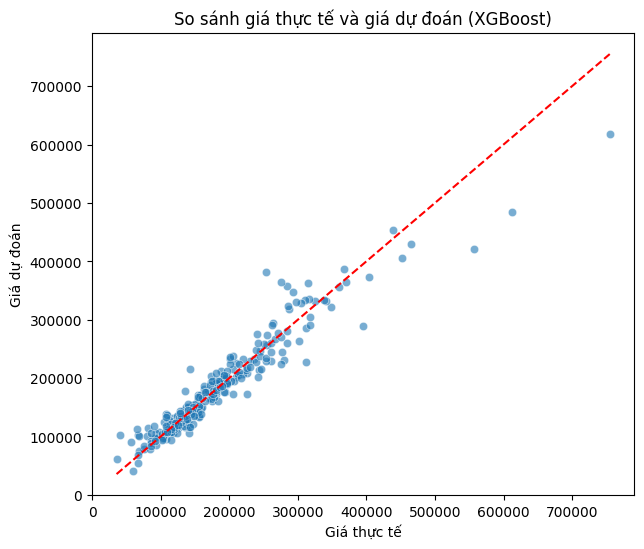

In [ ]:
# 6. Vẽ biểu đồ Accuracy
best_model_name = results_df.iloc[0]["Model"]
best_preds = pred_dict[best_model_name]

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=best_preds, alpha=0.6)
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title(f"So sánh giá thực tế và giá dự đoán ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

-Biểu đồ thể hiện mô hình XGBoost hoạt động rất tốt,
các giá trị dự đoán phản ánh gần chính xác giá thực tế,
sai số chỉ xuất hiện ở các căn nhà giá cực cao.

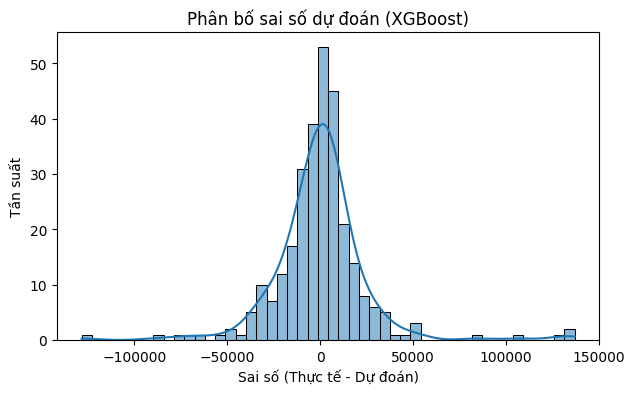

In [ ]:
# 7. Biểu đồ sai số
errors = y_test - best_preds
plt.figure(figsize=(7, 4))
sns.histplot(errors, kde=True)
plt.title(f"Phân bố sai số dự đoán ({best_model_name})")
plt.xlabel("Sai số (Thực tế - Dự đoán)")
plt.ylabel("Tần suất")
plt.show()

-Biểu đồ sai số cho thấy phần lớn dự đoán của mô hình XGBoost tập trung quanh sai số 0, phân phối gần chuẩn và đối xứng. Mô hình không bị thiên lệch, sai số trung bình thấp, chỉ có một vài giá trị ngoại lai ở các căn nhà giá trị cao. Điều này chứng minh mô hình dự đoán ổn định và đáng tin cậy.


# **PHẦN 4 : VẼ MA TRẬN NHẦM LẪN & PHÂN BỐ GIÁ NHÀ**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

best_model_name = results_df.iloc[0]["Model"]
best_preds = pred_dict[best_model_name]
print(f"Mô hình tốt nhất: {best_model_name}")

Mô hình tốt nhất: XGBoost


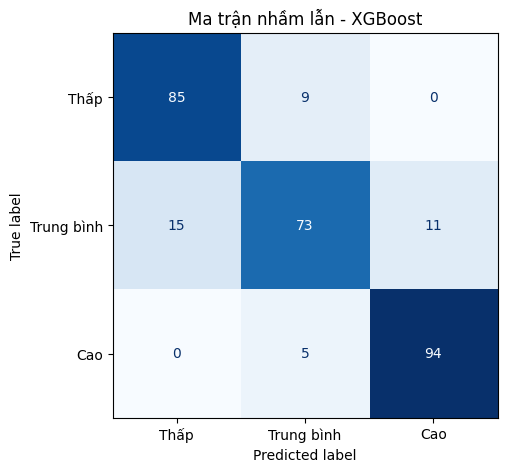

In [ ]:
# 1. Chia giá nhà thành nhóm
bins = np.quantile(y_test, [0, 0.33, 0.66, 1])
y_true_class = np.digitize(y_test, bins)
y_pred_class = np.digitize(best_preds, bins)

# Đảm bảo giá trị trong khoảng 1-3 (loại bỏ lỗi ngoài vùng)
y_true_class = np.clip(y_true_class, 1, 3)
y_pred_class = np.clip(y_pred_class, 1, 3)

# 2. Ma trận nhầm lẫn
cm = confusion_matrix(y_true_class, y_pred_class, labels=[1, 2, 3])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Thấp", "Trung bình", "Cao"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap="Blues", colorbar=False, ax=ax)
plt.title(f"Ma trận nhầm lẫn - {best_model_name}")
plt.show()

-Ma trận nhầm lẫn cho thấy mô hình XGBoost đạt độ chính xác cao trong việc phân loại 3 nhóm giá nhà (Thấp, Trung bình, Cao). Hầu hết các dự đoán nằm trên đường chéo chính, thể hiện khả năng nhận diện tốt. Nhóm giá trung bình có một số sai lệch nhẹ do ranh giới mờ giữa các mức giá, nhưng tổng thể mô hình vẫn đảm bảo tính ổn định và đáng tin cậy.

# Phần 5: Tuning hyperparameter XGBoostđể giảm thêm RMSE.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Khởi tạo model cơ bản
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

# Tập siêu tham số
param_grid = {
    "n_estimators": [500, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

# Cấu hình GridSearch
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Huấn luyện
grid.fit(X_scaled, np.log1p(y))

# In kết quả
print("Best parameters:", grid.best_params_)
print("Best CV RMSE (log-scale):", -grid.best_score_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


KeyboardInterrupt: 

In [ ]:
#tuning mô hình với 40 đặc trưng

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

param_dist = {
    "n_estimators": [500, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_scaled, np.log1p(y))

print("Best parameters:", rs.best_params_)
print("Best CV RMSE :", -rs.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV RMSE : 0.12513339045473693


Đánh giá

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
import numpy as np

# Dự đoán giá nhà
y_pred = np.expm1(rs.best_estimator_.predict(X_test))
y_true = y_test.copy()

# 1. R2
r2 = r2_score(y_true, y_pred)

# 2. RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# 3. MAE
mae = mean_absolute_error(y_true, y_pred)

# 4. F1-score
bins = np.quantile(y_true, [0, 0.33, 0.66, 1])
y_class = np.digitize(y_true, bins)
y_pred_class = np.digitize(y_pred, bins)
f1 = f1_score(y_class, y_pred_class, average="weighted")

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"F1-score: {f1:.4f}")



R²: 0.9862
RMSE: 10,293.49
MAE: 6,987.03
F1-score: 0.9082


Nhận xét:
R² = 0.9862 → Mô hình giải thích khoảng 98.6% phương sai của giá nhà. Đây là giá trị rất cao, cho thấy mô hình fit dữ liệu rất tốt.

RMSE = 10,293.49 → Sai số trung bình theo chuẩn bình phương khoảng 10.3 nghìn (giả sử đơn vị là USD). So với giá nhà trung bình, đây là mức sai số khá thấp.

MAE = 6,987.03 → Sai số tuyệt đối trung bình khoảng 7 nghìn, nghĩa là dự đoán trung bình lệch khoảng 7 nghìn so với giá thật, cũng khá hợp lý.

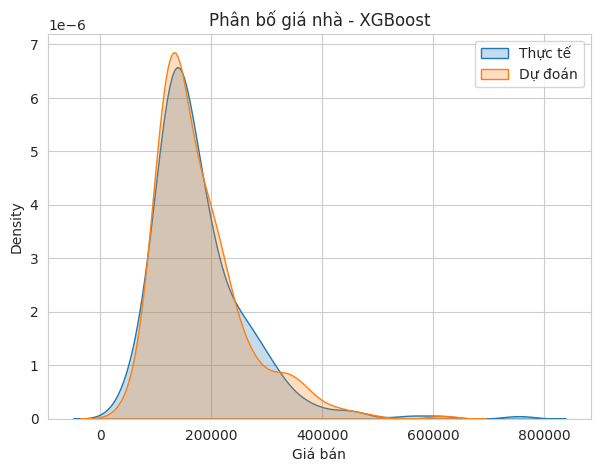

In [ ]:
# Biểu đồ phân bố giá thực tế vs dự đoán
plt.figure(figsize=(7, 5))
sns.kdeplot(y_test, label="Thực tế", fill=True)
sns.kdeplot(best_preds, label="Dự đoán", fill=True)
plt.title(f"Phân bố giá nhà - {best_model_name}")
plt.xlabel("Giá bán")
plt.legend()
plt.show()

# **Phần 6: stacking các mô hình để bù trừ lẫn nhau.**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd

best_xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.6,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1,
    tree_method='hist'
)

best_lgb = models['LightGBM']
best_rf = RandomForestRegressor(n_estimators=500, random_state=42)

stack_model = StackingRegressor(
    estimators=[
        ('xgb', best_xgb),
        ('lgb', best_lgb),
        ('rf', best_rf)
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

stack_model, results_stack = compile_and_evaluate_model(
    "Stacking_XGB_LGB_RF",
    stack_model,
    X_train, y_train,
    X_test, y_test
)

results.append(results_stack)
results_df = pd.DataFrame(results).drop(columns=["Preds"]).sort_values(by="R2", ascending=False)
display(results_df)




Đang compile và huấn luyện mô hình: Stacking_XGB_LGB_RF 
R²: 0.9127 | RMSE: 25875.22 | MAE: 15395.68 | F1: 0.8649


,Model,R2,RMSE,MAE,F1
4,XGBoost,0.914619,25591.067192,15574.893555,0.855733
6,Stacking_XGB_LGB_RF,0.912712,25875.224339,15395.675178,0.864859
5,LightGBM,0.889950,29053.742875,16695.970994,0.871768
2,Random Forest,0.881856,30103.248515,17821.214966,0.849922
3,Polynomial Regression (deg=2),0.828365,36283.526216,24509.343922,0.686767
1,Lasso Regression,0.411621,67179.327419,22671.409140,0.817222
0,Linear Regression,0.103489,82924.878932,24052.498302,0.817222


Đánh giá: không cải thiện với tunning nên chọn xgboosting là mô hình cuối cùng cho bài dự đoán

In [ ]:
import joblib

# Lưu mô hình XGBoost tuning tốt nhất
joblib.dump(rs.best_estimator_, "xgb_tuned_model.pkl")



['xgb_tuned_model.pkl']

Vẽ mô hình so sánh vs giá nhà thực tế


In [ ]:

# Dự đoán giá từ XGBoost tuning (train trên log1p(y))
y_pred_log = rs.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred_log)  # chuyển về y gốc

# Lấy y_test
y_true = y_test.copy()


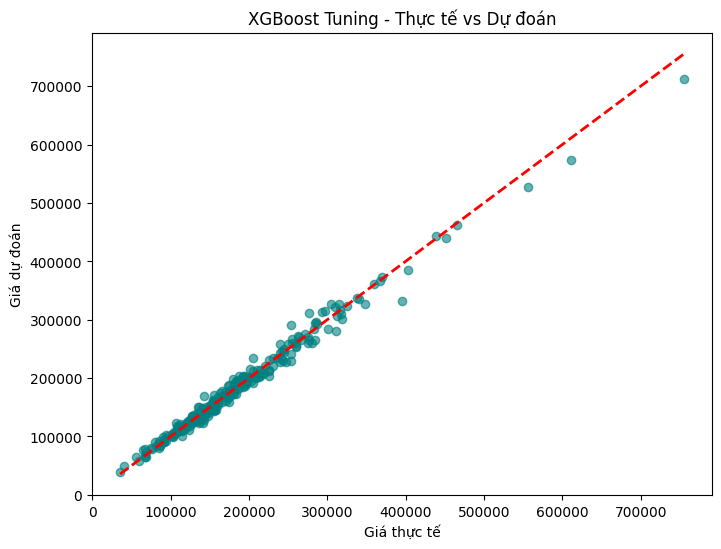

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred, alpha=0.6, color='teal')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # đường y=x
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("XGBoost Tuning - Thực tế vs Dự đoán")
plt.show()


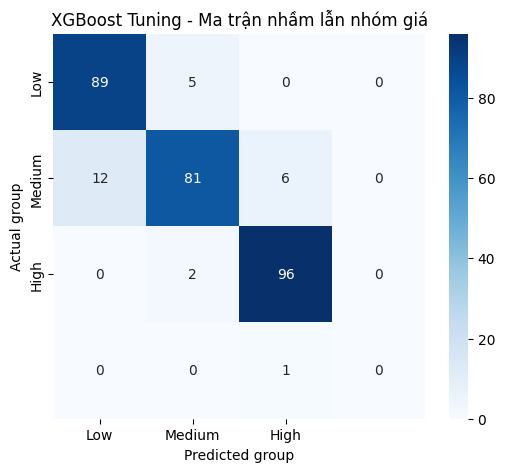

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Chia 3 nhóm theo quantile
bins = np.quantile(y_true, [0, 0.33, 0.66, 1])
y_class = np.digitize(y_true, bins)
y_pred_class = np.digitize(y_pred, bins)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_class, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted group")
plt.ylabel("Actual group")
plt.title("XGBoost Tuning - Ma trận nhầm lẫn nhóm giá")
plt.show()


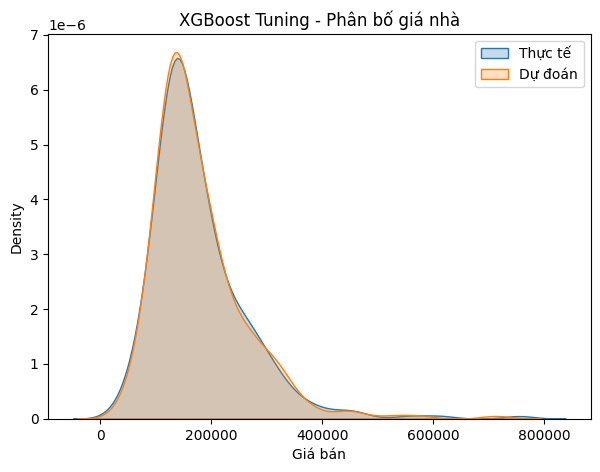

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.kdeplot(y_true, label="Thực tế", fill=True)
sns.kdeplot(y_pred, label="Dự đoán", fill=True)
plt.xlabel("Giá bán")
plt.title("XGBoost Tuning - Phân bố giá nhà")
plt.legend()
plt.show()


nhận xét: Mô hình XGBoost tuning rất tốt về dự đoán trung bình và phân bố tổng thể.

Chỉ cần chú ý các giá cực đại có thể bị dự đoán cao hơn thực tế.

